In [326]:
import numpy as np
import matplotlib.pyplot as plt 
import random


In [327]:
#initial state is susceptible
state_vector = [1,0,0]

## Task c

Making a function to simulate the continuous-time Markov chain over any time interval. Plotting the realization over 5 years.

In [328]:
#making a function to simulate the continous-time markov chain for any number of days
def cont_markov_model(days,state_vec):
    #starting at time t=0
    i=0
    
    #making a vector for the sojourn times as well as the state change
    #so that each sojourn time for every state will last from f.ex. a->b and at b it will change state
    #example: if sojourn_vec is [0,3] and corresponding_state_vec is [0,2] it means that it will change to state 2 at time=3
    sojourn_vec = [0]
    corresponding_state_vec = []
    
    while i < days:
        if state_vec[0]==1:
            time_til_inf = np.random.exponential(100)
            if (i+time_til_inf)>days:
                time_til_inf=days-i
            i+=time_til_inf
            sojourn_vec.append(i)
            corresponding_state_vec.append(0)
            
            
            #using binomial distribution to see whether it is a light or heavy infection
            is_it_heavy = np.random.binomial(1,0.1)
            if is_it_heavy==1:
                state_vec[2]=1
                state_vec[0]=0
            else:
                state_vec[1]=1
                state_vec[0]=0
                
                
        if state_vec[1]==1:
            time_til_susp = np.random.exponential(7)
            if (i+time_til_susp)>days:
                time_til_susp=days-i
            i+=time_til_susp
            sojourn_vec.append(i)
            corresponding_state_vec.append(1)
            state_vec[0]=1
            state_vec[1]=0
            
            
        if state_vec[2]==1:
            time_til_susp = np.random.exponential(20)
            if (i+time_til_susp)>days:
                time_til_susp=days-i
            i+=time_til_susp
            sojourn_vec.append(i)
            corresponding_state_vec.append(2)
            state_vec[0]=1
            state_vec[2]=0
    return sojourn_vec[0:len(sojourn_vec)-1],corresponding_state_vec[0:len(corresponding_state_vec)-1]
            

In [343]:
#modelling the markov chain for 5 years
soj,state = cont_markov_model(365000,state_vector)

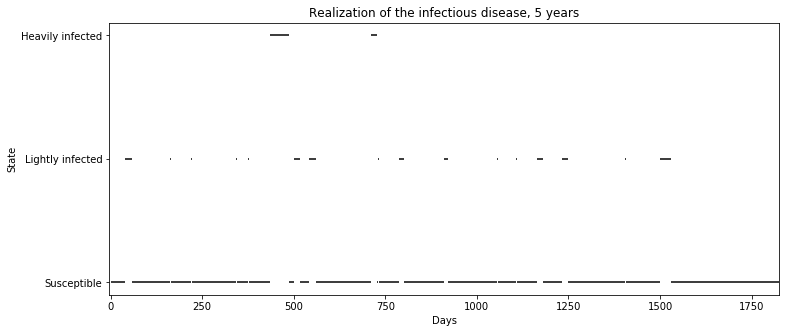

In [346]:
plt.figure(figsize=(12,5))
plt.title("Realization of the infectious disease, 5 years")
plt.xlabel("Days")
plt.ylabel("State")
plt.hlines(state,soj[0:len(soj)-1],soj[1:len(soj)])
y=[0,1,2]
plt.yticks(y,("Susceptible","Lightly infected","Heavily infected"))
plt.savefig('5yearinfection.pdf')
plt.xlim(-3,1825)
plt.show()

In [331]:
#Simulating the Markov chain for a period of 1000 years
soj_1000,state_1000 = cont_markov_model(365000,state_vector)

for i in range(len(soj_1000)-1):
    print("time",soj_1000[i],"->","time",soj_1000[i+1],"is spent in state",state_1000[i])

time 0 -> time 92.8064991070784 is spent in state 0
time 92.8064991070784 -> time 97.23946077554331 is spent in state 1
time 97.23946077554331 -> time 97.90345777242776 is spent in state 0
time 97.90345777242776 -> time 107.23333551060512 is spent in state 1
time 107.23333551060512 -> time 218.54369641250656 is spent in state 0
time 218.54369641250656 -> time 224.05661479117066 is spent in state 1
time 224.05661479117066 -> time 308.22634154959735 is spent in state 0
time 308.22634154959735 -> time 311.7341360041096 is spent in state 1
time 311.7341360041096 -> time 322.39164499768793 is spent in state 0
time 322.39164499768793 -> time 322.40682215932077 is spent in state 2
time 322.40682215932077 -> time 392.39641817335047 is spent in state 0
time 392.39641817335047 -> time 400.596471531182 is spent in state 1
time 400.596471531182 -> time 415.49319705665937 is spent in state 0
time 415.49319705665937 -> time 417.2102066701426 is spent in state 1
time 417.2102066701426 -> time 601.907

time 10461.764233991777 -> time 10469.904458608937 is spent in state 1
time 10469.904458608937 -> time 10558.250491079163 is spent in state 0
time 10558.250491079163 -> time 10567.88254000665 is spent in state 1
time 10567.88254000665 -> time 10782.3193660215 is spent in state 0
time 10782.3193660215 -> time 10783.615353409208 is spent in state 1
time 10783.615353409208 -> time 10922.38579736041 is spent in state 0
time 10922.38579736041 -> time 10923.436190572967 is spent in state 1
time 10923.436190572967 -> time 10981.757329727341 is spent in state 0
time 10981.757329727341 -> time 10995.396055214485 is spent in state 1
time 10995.396055214485 -> time 11087.426960484003 is spent in state 0
time 11087.426960484003 -> time 11115.07632955168 is spent in state 2
time 11115.07632955168 -> time 11123.575477609653 is spent in state 0
time 11123.575477609653 -> time 11124.210503520178 is spent in state 1
time 11124.210503520178 -> time 11125.987345515226 is spent in state 0
time 11125.98734

time 24765.900961082898 -> time 24772.00299466013 is spent in state 1
time 24772.00299466013 -> time 24776.2079127024 is spent in state 0
time 24776.2079127024 -> time 24786.60617751059 is spent in state 1
time 24786.60617751059 -> time 24882.60577460798 is spent in state 0
time 24882.60577460798 -> time 24888.36608867548 is spent in state 1
time 24888.36608867548 -> time 24902.06216540824 is spent in state 0
time 24902.06216540824 -> time 24937.0175067842 is spent in state 2
time 24937.0175067842 -> time 24999.25611282445 is spent in state 0
time 24999.25611282445 -> time 25016.797287084064 is spent in state 1
time 25016.797287084064 -> time 25079.979537133026 is spent in state 0
time 25079.979537133026 -> time 25080.80551003453 is spent in state 1
time 25080.80551003453 -> time 25130.859233020343 is spent in state 0
time 25130.859233020343 -> time 25144.530733760697 is spent in state 1
time 25144.530733760697 -> time 25251.738921913842 is spent in state 0
time 25251.738921913842 -> t

time 38579.06898664689 -> time 38579.31974894741 is spent in state 1
time 38579.31974894741 -> time 38642.64452867925 is spent in state 0
time 38642.64452867925 -> time 38644.64417661648 is spent in state 1
time 38644.64417661648 -> time 38648.33996949213 is spent in state 0
time 38648.33996949213 -> time 38663.88338038787 is spent in state 1
time 38663.88338038787 -> time 38726.3545939825 is spent in state 0
time 38726.3545939825 -> time 38730.553888209826 is spent in state 1
time 38730.553888209826 -> time 38850.11116597196 is spent in state 0
time 38850.11116597196 -> time 38862.729660596335 is spent in state 1
time 38862.729660596335 -> time 38894.994430505525 is spent in state 0
time 38894.994430505525 -> time 38903.75225912432 is spent in state 1
time 38903.75225912432 -> time 38912.163673537434 is spent in state 0
time 38912.163673537434 -> time 38916.94560174426 is spent in state 1
time 38916.94560174426 -> time 39208.5154864503 is spent in state 0
time 39208.5154864503 -> time

time 49534.09444773762 -> time 49540.66021585483 is spent in state 1
time 49540.66021585483 -> time 49603.412990647055 is spent in state 0
time 49603.412990647055 -> time 49610.46600282828 is spent in state 1
time 49610.46600282828 -> time 49649.85388938093 is spent in state 0
time 49649.85388938093 -> time 49662.88447932899 is spent in state 1
time 49662.88447932899 -> time 49676.57283602776 is spent in state 0
time 49676.57283602776 -> time 49684.52055792995 is spent in state 1
time 49684.52055792995 -> time 49734.69568231755 is spent in state 0
time 49734.69568231755 -> time 49738.16405809035 is spent in state 1
time 49738.16405809035 -> time 49740.166531984825 is spent in state 0
time 49740.166531984825 -> time 49751.33136421643 is spent in state 1
time 49751.33136421643 -> time 49842.87946979805 is spent in state 0
time 49842.87946979805 -> time 49847.29820737582 is spent in state 1
time 49847.29820737582 -> time 49909.73520188399 is spent in state 0
time 49909.73520188399 -> time

time 63914.61698830103 -> time 63914.638934393406 is spent in state 1
time 63914.638934393406 -> time 63929.144276344836 is spent in state 0
time 63929.144276344836 -> time 63930.854359367484 is spent in state 1
time 63930.854359367484 -> time 63981.260273864806 is spent in state 0
time 63981.260273864806 -> time 63983.42804906117 is spent in state 1
time 63983.42804906117 -> time 64043.06652231826 is spent in state 0
time 64043.06652231826 -> time 64046.25900548702 is spent in state 1
time 64046.25900548702 -> time 64069.38549814742 is spent in state 0
time 64069.38549814742 -> time 64094.2760952866 is spent in state 1
time 64094.2760952866 -> time 64116.99105083557 is spent in state 0
time 64116.99105083557 -> time 64149.987327901596 is spent in state 2
time 64149.987327901596 -> time 64355.53682694288 is spent in state 0
time 64355.53682694288 -> time 64357.45040483882 is spent in state 2
time 64357.45040483882 -> time 64404.986591188135 is spent in state 0
time 64404.986591188135 -

time 79446.0253968168 -> time 79481.4075613049 is spent in state 0
time 79481.4075613049 -> time 79501.73167208173 is spent in state 1
time 79501.73167208173 -> time 79723.63398153524 is spent in state 0
time 79723.63398153524 -> time 79726.7681544396 is spent in state 1
time 79726.7681544396 -> time 79788.52258671443 is spent in state 0
time 79788.52258671443 -> time 79804.93358121188 is spent in state 1
time 79804.93358121188 -> time 80207.21204225479 is spent in state 0
time 80207.21204225479 -> time 80209.05015428092 is spent in state 1
time 80209.05015428092 -> time 80330.51992265835 is spent in state 0
time 80330.51992265835 -> time 80337.64461402954 is spent in state 1
time 80337.64461402954 -> time 80578.4832206732 is spent in state 0
time 80578.4832206732 -> time 80589.01859074815 is spent in state 1
time 80589.01859074815 -> time 80643.65499677896 is spent in state 0
time 80643.65499677896 -> time 80658.56157698386 is spent in state 1
time 80658.56157698386 -> time 80666.2116

time 92415.6584572304 -> time 92510.97110877537 is spent in state 0
time 92510.97110877537 -> time 92515.47048590574 is spent in state 2
time 92515.47048590574 -> time 92575.62990112016 is spent in state 0
time 92575.62990112016 -> time 92575.74497908943 is spent in state 1
time 92575.74497908943 -> time 92626.47862444127 is spent in state 0
time 92626.47862444127 -> time 92638.55772002209 is spent in state 1
time 92638.55772002209 -> time 92682.07292334277 is spent in state 0
time 92682.07292334277 -> time 92696.26792367407 is spent in state 1
time 92696.26792367407 -> time 92791.37104053465 is spent in state 0
time 92791.37104053465 -> time 92793.46555002488 is spent in state 1
time 92793.46555002488 -> time 92858.48542520951 is spent in state 0
time 92858.48542520951 -> time 92862.38695060842 is spent in state 1
time 92862.38695060842 -> time 93002.90976049445 is spent in state 0
time 93002.90976049445 -> time 93009.47512823844 is spent in state 1
time 93009.47512823844 -> time 9301

time 107810.12615127742 -> time 107911.82116255657 is spent in state 0
time 107911.82116255657 -> time 107915.8019250201 is spent in state 1
time 107915.8019250201 -> time 107949.09699672647 is spent in state 0
time 107949.09699672647 -> time 107964.11111083363 is spent in state 1
time 107964.11111083363 -> time 108002.96311660158 is spent in state 0
time 108002.96311660158 -> time 108003.25731638465 is spent in state 2
time 108003.25731638465 -> time 108012.19400804873 is spent in state 0
time 108012.19400804873 -> time 108015.25820098852 is spent in state 1
time 108015.25820098852 -> time 108103.55877357705 is spent in state 0
time 108103.55877357705 -> time 108111.87115481806 is spent in state 1
time 108111.87115481806 -> time 108465.29109516245 is spent in state 0
time 108465.29109516245 -> time 108486.6074373083 is spent in state 1
time 108486.6074373083 -> time 108533.38874336994 is spent in state 0
time 108533.38874336994 -> time 108548.85424113437 is spent in state 2
time 10854

time 122464.521736336 -> time 122491.96458350752 is spent in state 0
time 122491.96458350752 -> time 122498.98181276457 is spent in state 2
time 122498.98181276457 -> time 122646.63012777013 is spent in state 0
time 122646.63012777013 -> time 122647.69769082405 is spent in state 1
time 122647.69769082405 -> time 122701.89542175442 is spent in state 0
time 122701.89542175442 -> time 122713.12806099512 is spent in state 1
time 122713.12806099512 -> time 122781.65914271292 is spent in state 0
time 122781.65914271292 -> time 122807.97784217432 is spent in state 2
time 122807.97784217432 -> time 122853.06183744133 is spent in state 0
time 122853.06183744133 -> time 122853.50371615094 is spent in state 1
time 122853.50371615094 -> time 123033.00792178209 is spent in state 0
time 123033.00792178209 -> time 123035.38461063377 is spent in state 1
time 123035.38461063377 -> time 123110.8166318702 is spent in state 0
time 123110.8166318702 -> time 123116.23758883252 is spent in state 1
time 12311

time 134314.71000239823 -> time 134439.83526867203 is spent in state 0
time 134439.83526867203 -> time 134465.34788016064 is spent in state 2
time 134465.34788016064 -> time 134657.18755877594 is spent in state 0
time 134657.18755877594 -> time 134665.08566533978 is spent in state 1
time 134665.08566533978 -> time 134718.17333066827 is spent in state 0
time 134718.17333066827 -> time 134719.73695505722 is spent in state 1
time 134719.73695505722 -> time 134799.08124144832 is spent in state 0
time 134799.08124144832 -> time 134800.44170826016 is spent in state 1
time 134800.44170826016 -> time 134837.3885628153 is spent in state 0
time 134837.3885628153 -> time 134855.8099706074 is spent in state 1
time 134855.8099706074 -> time 134918.26820703072 is spent in state 0
time 134918.26820703072 -> time 134919.63942137157 is spent in state 1
time 134919.63942137157 -> time 135042.01289720886 is spent in state 0
time 135042.01289720886 -> time 135046.97890402947 is spent in state 1
time 13504

time 148881.3189946928 -> time 149172.04577037718 is spent in state 0
time 149172.04577037718 -> time 149189.1188684903 is spent in state 1
time 149189.1188684903 -> time 149311.0228542241 is spent in state 0
time 149311.0228542241 -> time 149313.39258475677 is spent in state 1
time 149313.39258475677 -> time 149320.7670419468 is spent in state 0
time 149320.7670419468 -> time 149328.07886410083 is spent in state 1
time 149328.07886410083 -> time 149355.2949979402 is spent in state 0
time 149355.2949979402 -> time 149358.4244726241 is spent in state 1
time 149358.4244726241 -> time 149476.72186174776 is spent in state 0
time 149476.72186174776 -> time 149482.01806106188 is spent in state 1
time 149482.01806106188 -> time 149543.4109988351 is spent in state 0
time 149543.4109988351 -> time 149556.16588130992 is spent in state 2
time 149556.16588130992 -> time 149598.7540762472 is spent in state 0
time 149598.7540762472 -> time 149604.10204103298 is spent in state 1
time 149604.102041032

time 160067.7173301833 -> time 160095.60299182573 is spent in state 0
time 160095.60299182573 -> time 160096.16463291494 is spent in state 1
time 160096.16463291494 -> time 160133.29861120015 is spent in state 0
time 160133.29861120015 -> time 160139.01546218627 is spent in state 1
time 160139.01546218627 -> time 160386.45324897315 is spent in state 0
time 160386.45324897315 -> time 160406.30478960124 is spent in state 1
time 160406.30478960124 -> time 160443.92013378162 is spent in state 0
time 160443.92013378162 -> time 160450.12804764294 is spent in state 1
time 160450.12804764294 -> time 160640.36220108712 is spent in state 0
time 160640.36220108712 -> time 160652.14014379706 is spent in state 1
time 160652.14014379706 -> time 160662.57574958465 is spent in state 0
time 160662.57574958465 -> time 160690.64942004817 is spent in state 1
time 160690.64942004817 -> time 160764.4641701402 is spent in state 0
time 160764.4641701402 -> time 160770.57053751787 is spent in state 1
time 1607

time 171810.77076896795 -> time 171957.99502666053 is spent in state 0
time 171957.99502666053 -> time 171963.54887005966 is spent in state 2
time 171963.54887005966 -> time 172070.03424495758 is spent in state 0
time 172070.03424495758 -> time 172084.08811118972 is spent in state 1
time 172084.08811118972 -> time 172174.65706113374 is spent in state 0
time 172174.65706113374 -> time 172178.53844926826 is spent in state 1
time 172178.53844926826 -> time 172372.1689282128 is spent in state 0
time 172372.1689282128 -> time 172377.6075947912 is spent in state 1
time 172377.6075947912 -> time 172514.5753012817 is spent in state 0
time 172514.5753012817 -> time 172522.59756192344 is spent in state 1
time 172522.59756192344 -> time 172572.35346364594 is spent in state 0
time 172572.35346364594 -> time 172573.673156743 is spent in state 1
time 172573.673156743 -> time 172662.2870769626 is spent in state 0
time 172662.2870769626 -> time 172687.9276662887 is spent in state 2
time 172687.9276662

time 188030.4739216291 -> time 188167.52779381213 is spent in state 0
time 188167.52779381213 -> time 188169.99422260595 is spent in state 1
time 188169.99422260595 -> time 188246.93067845097 is spent in state 0
time 188246.93067845097 -> time 188260.1228126569 is spent in state 1
time 188260.1228126569 -> time 188321.86325042864 is spent in state 0
time 188321.86325042864 -> time 188322.39864759753 is spent in state 1
time 188322.39864759753 -> time 188325.4258946189 is spent in state 0
time 188325.4258946189 -> time 188333.342001689 is spent in state 1
time 188333.342001689 -> time 188455.06506334114 is spent in state 0
time 188455.06506334114 -> time 188463.49769588854 is spent in state 1
time 188463.49769588854 -> time 188558.35302505395 is spent in state 0
time 188558.35302505395 -> time 188560.20842152316 is spent in state 1
time 188560.20842152316 -> time 188666.40173035077 is spent in state 0
time 188666.40173035077 -> time 188672.82439735407 is spent in state 1
time 188672.824

time 201401.32367284078 -> time 201416.39521852107 is spent in state 1
time 201416.39521852107 -> time 201472.50113064033 is spent in state 0
time 201472.50113064033 -> time 201482.7348655039 is spent in state 1
time 201482.7348655039 -> time 201600.28712908123 is spent in state 0
time 201600.28712908123 -> time 201605.81259289038 is spent in state 1
time 201605.81259289038 -> time 201666.47538633514 is spent in state 0
time 201666.47538633514 -> time 201667.24191174767 is spent in state 2
time 201667.24191174767 -> time 201710.64703369996 is spent in state 0
time 201710.64703369996 -> time 201719.9311428201 is spent in state 1
time 201719.9311428201 -> time 201747.6506552712 is spent in state 0
time 201747.6506552712 -> time 201753.1422630899 is spent in state 1
time 201753.1422630899 -> time 201805.8161100951 is spent in state 0
time 201805.8161100951 -> time 201812.2823148021 is spent in state 1
time 201812.2823148021 -> time 201930.33724702365 is spent in state 0
time 201930.337247

time 216564.25557928998 -> time 216564.98950659085 is spent in state 1
time 216564.98950659085 -> time 216583.87960230606 is spent in state 0
time 216583.87960230606 -> time 216584.5999548371 is spent in state 1
time 216584.5999548371 -> time 216613.2379087583 is spent in state 0
time 216613.2379087583 -> time 216621.84367611245 is spent in state 1
time 216621.84367611245 -> time 216672.89039239817 is spent in state 0
time 216672.89039239817 -> time 216700.29648369897 is spent in state 1
time 216700.29648369897 -> time 216740.24732282292 is spent in state 0
time 216740.24732282292 -> time 216786.56030031497 is spent in state 2
time 216786.56030031497 -> time 216820.83161995964 is spent in state 0
time 216820.83161995964 -> time 216827.28439840782 is spent in state 1
time 216827.28439840782 -> time 216916.99289429773 is spent in state 0
time 216916.99289429773 -> time 216917.03934419967 is spent in state 1
time 216917.03934419967 -> time 216994.09800604556 is spent in state 0
time 21699

time 231318.78568903566 -> time 231326.83316367285 is spent in state 1
time 231326.83316367285 -> time 231352.72653696776 is spent in state 0
time 231352.72653696776 -> time 231356.2987021179 is spent in state 1
time 231356.2987021179 -> time 231465.61724989724 is spent in state 0
time 231465.61724989724 -> time 231473.27935670808 is spent in state 1
time 231473.27935670808 -> time 231727.6660168788 is spent in state 0
time 231727.6660168788 -> time 231743.69192253076 is spent in state 1
time 231743.69192253076 -> time 231851.16008628195 is spent in state 0
time 231851.16008628195 -> time 231859.26454187295 is spent in state 1
time 231859.26454187295 -> time 231972.747547098 is spent in state 0
time 231972.747547098 -> time 231976.21255381915 is spent in state 1
time 231976.21255381915 -> time 232074.87087062217 is spent in state 0
time 232074.87087062217 -> time 232114.8635560586 is spent in state 1
time 232114.8635560586 -> time 232116.5073534825 is spent in state 0
time 232116.50735

time 247710.738188232 -> time 247899.89698635702 is spent in state 0
time 247899.89698635702 -> time 247902.6688006547 is spent in state 1
time 247902.6688006547 -> time 247948.82065713083 is spent in state 0
time 247948.82065713083 -> time 247984.15312895854 is spent in state 1
time 247984.15312895854 -> time 247989.232043232 is spent in state 0
time 247989.232043232 -> time 247999.85075792464 is spent in state 2
time 247999.85075792464 -> time 248019.72732588183 is spent in state 0
time 248019.72732588183 -> time 248025.6473241487 is spent in state 1
time 248025.6473241487 -> time 248251.14932025233 is spent in state 0
time 248251.14932025233 -> time 248255.0182569555 is spent in state 1
time 248255.0182569555 -> time 248420.68331716507 is spent in state 0
time 248420.68331716507 -> time 248428.1376115427 is spent in state 1
time 248428.1376115427 -> time 248597.42998080392 is spent in state 0
time 248597.42998080392 -> time 248607.87340404882 is spent in state 1
time 248607.87340404

time 263639.5328391854 -> time 263798.22020929266 is spent in state 0
time 263798.22020929266 -> time 263800.0305740603 is spent in state 1
time 263800.0305740603 -> time 263989.4887946241 is spent in state 0
time 263989.4887946241 -> time 263992.94302905665 is spent in state 1
time 263992.94302905665 -> time 264067.126306195 is spent in state 0
time 264067.126306195 -> time 264068.46123557095 is spent in state 2
time 264068.46123557095 -> time 264139.3120761099 is spent in state 0
time 264139.3120761099 -> time 264141.53397049045 is spent in state 1
time 264141.53397049045 -> time 264361.0754732032 is spent in state 0
time 264361.0754732032 -> time 264369.3366423682 is spent in state 1
time 264369.3366423682 -> time 264383.65436767344 is spent in state 0
time 264383.65436767344 -> time 264396.767482922 is spent in state 1
time 264396.767482922 -> time 264637.41644768295 is spent in state 0
time 264637.41644768295 -> time 264639.0261721279 is spent in state 1
time 264639.0261721279 -> 

time 279207.67905359576 -> time 279214.09250361496 is spent in state 1
time 279214.09250361496 -> time 279392.44482554635 is spent in state 0
time 279392.44482554635 -> time 279404.51625581825 is spent in state 2
time 279404.51625581825 -> time 279412.4217832627 is spent in state 0
time 279412.4217832627 -> time 279424.2393648329 is spent in state 1
time 279424.2393648329 -> time 279457.2618534388 is spent in state 0
time 279457.2618534388 -> time 279458.2463225147 is spent in state 1
time 279458.2463225147 -> time 279534.36392442265 is spent in state 0
time 279534.36392442265 -> time 279538.7120036922 is spent in state 1
time 279538.7120036922 -> time 279583.19112824183 is spent in state 0
time 279583.19112824183 -> time 279613.99823931436 is spent in state 2
time 279613.99823931436 -> time 279860.494919107 is spent in state 0
time 279860.494919107 -> time 279869.4611453143 is spent in state 1
time 279869.4611453143 -> time 279930.7473678698 is spent in state 0
time 279930.7473678698 

time 293734.0186197947 -> time 293735.46075616643 is spent in state 1
time 293735.46075616643 -> time 293764.21060268977 is spent in state 0
time 293764.21060268977 -> time 293768.27072594856 is spent in state 1
time 293768.27072594856 -> time 293792.7332738403 is spent in state 0
time 293792.7332738403 -> time 293800.48116212024 is spent in state 1
time 293800.48116212024 -> time 293930.7073545382 is spent in state 0
time 293930.7073545382 -> time 293934.05224357883 is spent in state 1
time 293934.05224357883 -> time 294271.05943512416 is spent in state 0
time 294271.05943512416 -> time 294271.40332726046 is spent in state 1
time 294271.40332726046 -> time 294479.3937398627 is spent in state 0
time 294479.3937398627 -> time 294479.834234502 is spent in state 2
time 294479.834234502 -> time 294612.49316826375 is spent in state 0
time 294612.49316826375 -> time 294636.0051874985 is spent in state 1
time 294636.0051874985 -> time 294896.77763868804 is spent in state 0
time 294896.7776386

time 311007.4622831175 -> time 311008.62235363707 is spent in state 1
time 311008.62235363707 -> time 311074.9660289832 is spent in state 0
time 311074.9660289832 -> time 311078.31403730187 is spent in state 2
time 311078.31403730187 -> time 311141.07247129106 is spent in state 0
time 311141.07247129106 -> time 311168.09604040056 is spent in state 1
time 311168.09604040056 -> time 311330.40681279154 is spent in state 0
time 311330.40681279154 -> time 311330.4198475648 is spent in state 1
time 311330.4198475648 -> time 311339.0019156829 is spent in state 0
time 311339.0019156829 -> time 311376.6208120365 is spent in state 2
time 311376.6208120365 -> time 311763.2799572169 is spent in state 0
time 311763.2799572169 -> time 311764.0594716916 is spent in state 1
time 311764.0594716916 -> time 311862.6241415226 is spent in state 0
time 311862.6241415226 -> time 311877.58336548647 is spent in state 1
time 311877.58336548647 -> time 311939.3823153527 is spent in state 0
time 311939.3823153527

time 323062.5522237101 -> time 323066.1735722959 is spent in state 2
time 323066.1735722959 -> time 323067.4169779933 is spent in state 0
time 323067.4169779933 -> time 323074.0209000567 is spent in state 1
time 323074.0209000567 -> time 323100.1359900601 is spent in state 0
time 323100.1359900601 -> time 323101.30358372134 is spent in state 1
time 323101.30358372134 -> time 323178.0497419919 is spent in state 0
time 323178.0497419919 -> time 323190.08868323825 is spent in state 1
time 323190.08868323825 -> time 323300.8550839734 is spent in state 0
time 323300.8550839734 -> time 323315.8294573086 is spent in state 1
time 323315.8294573086 -> time 323419.62379585294 is spent in state 0
time 323419.62379585294 -> time 323421.6843768051 is spent in state 1
time 323421.6843768051 -> time 323797.0297563409 is spent in state 0
time 323797.0297563409 -> time 323799.86032622424 is spent in state 1
time 323799.86032622424 -> time 323806.0871677506 is spent in state 0
time 323806.0871677506 -> 

time 339035.863169032 -> time 339047.5862636366 is spent in state 1
time 339047.5862636366 -> time 339063.6640919941 is spent in state 0
time 339063.6640919941 -> time 339074.4222330562 is spent in state 1
time 339074.4222330562 -> time 339115.1737649977 is spent in state 0
time 339115.1737649977 -> time 339198.98939994304 is spent in state 2
time 339198.98939994304 -> time 339262.6902384318 is spent in state 0
time 339262.6902384318 -> time 339262.8688782854 is spent in state 1
time 339262.8688782854 -> time 339378.5881421573 is spent in state 0
time 339378.5881421573 -> time 339383.16909873375 is spent in state 1
time 339383.16909873375 -> time 339438.4410295648 is spent in state 0
time 339438.4410295648 -> time 339443.7321310521 is spent in state 1
time 339443.7321310521 -> time 339445.51532805903 is spent in state 0
time 339445.51532805903 -> time 339449.3055329716 is spent in state 1
time 339449.3055329716 -> time 339508.3902641096 is spent in state 0
time 339508.3902641096 -> tim

time 354901.1583380691 -> time 355014.2986730067 is spent in state 0
time 355014.2986730067 -> time 355027.2830894339 is spent in state 2
time 355027.2830894339 -> time 355050.89315562265 is spent in state 0
time 355050.89315562265 -> time 355053.37027199403 is spent in state 1
time 355053.37027199403 -> time 355293.935175504 is spent in state 0
time 355293.935175504 -> time 355312.651829374 is spent in state 1
time 355312.651829374 -> time 355422.2015014873 is spent in state 0
time 355422.2015014873 -> time 355427.56707170897 is spent in state 2
time 355427.56707170897 -> time 355512.2475990791 is spent in state 0
time 355512.2475990791 -> time 355515.9553458074 is spent in state 1
time 355515.9553458074 -> time 355520.66021002224 is spent in state 0
time 355520.66021002224 -> time 355529.8956295258 is spent in state 1
time 355529.8956295258 -> time 355709.8801423706 is spent in state 0
time 355709.8801423706 -> time 355712.4227142479 is spent in state 1
time 355712.4227142479 -> time

## Task d

Estimating the long-run mean fraction of time that an individual has an infection (heavy or light).

In [332]:
#calculating the long run mean fraction of time that someone will stay infected
inf_lst=[]

for i in range(len(state_1000)):
    if state_1000[i]!=0:
        soj_inf = soj_1000[i+1]-soj_1000[i]
        inf_lst.append(soj_inf)

In [333]:
print("The mean fraction of time someone will stay infected is, per infection,",sum(inf_lst)/len(inf_lst),"days")
print("The long run mean fraction of time someone will stay infected is",sum(inf_lst)/365000)
print("This means a person is infected",round(sum(inf_lst)*100/365000,2),"% of their life.")


The mean fraction of time someone will stay infected is, per infection, 8.304349734009902 days
The long run mean fraction of time someone will stay infected is 0.07667303727017362
This means a person is infected 7.67 % of their life.


Mean fraction someone is susceptible: 0.9233117754017569
Mean fraction someone is lightly infected: 0.05795561936125357
Mean fraction someone is heavily infected: 0.018717417908920057


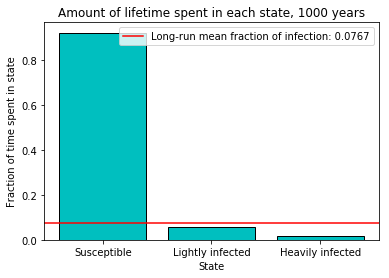

In [334]:
#verifying that our results in b are correct
susp_lst = []
iL_lst = []
iH_lst = []


for i in range(len(state_1000)):
    if state_1000[i]==0:
        sojy = soj_1000[i+1]-soj_1000[i]
        susp_lst.append(sojy)
    if state_1000[i]==1:
        ily = soj_1000[i+1]-soj_1000[i]
        iL_lst.append(ily)
    if state_1000[i]==2:
        ihy = soj_1000[i+1]-soj_1000[i]
        iH_lst.append(ihy)
        
print("Mean fraction someone is susceptible:",sum(susp_lst)/365000)
print("Mean fraction someone is lightly infected:",sum(iL_lst)/365000)
print("Mean fraction someone is heavily infected:",sum(iH_lst)/365000)
#verified

#graphing a histogram of the days spent in each state
x=[0,1,2]
plt.title("Amount of lifetime spent in each state, 1000 years")
plt.bar(x,[sum(susp_lst)/365000,sum(iL_lst)/365000,sum(iH_lst)/365000],color='c',edgecolor='k')
plt.xticks(x,("Susceptible","Lightly infected","Heavily infected"))
plt.axhline((sum(inf_lst)/365000),color='r',label="Long-run mean fraction of infection: "+str(round(sum(inf_lst)/365000,4)))
plt.ylabel("Fraction of time spent in state")
plt.xlabel("State")
plt.legend()
plt.savefig('1000yrhist.pdf')
plt.show()

## Task e
Finding an estimate for the average time between each heavy infection.

In [335]:
avg_next_heavy=[]
#we are looking from start til end, but as one always starts in susceptible position we need to exclude the first interval
soj_end=0
soj_begin=0
for i in range(len(state_1000)):
    if state_1000[i]==2:
        soj_begin=soj_1000[i]
        time_between = soj_begin - soj_end
        avg_next_heavy.append(time_between)
        soj_end=soj_1000[i+1]
#excluding the first one as it is from susceptible to heavy, not heavy->heavy
avg_next_heavy = avg_next_heavy[1:len(avg_next_heavy)]
    
        
avg_days_waiting=sum(avg_next_heavy)/(len(avg_next_heavy))

In [336]:
print("Days without heavy infection:",sum(avg_next_heavy))
print("Average time between each heavy infection:",avg_days_waiting)

print(sum(avg_next_heavy)/365000,"percent of the year is spent waiting for the next heavy infection.")

Days without heavy infection: 357103.6438136227
Average time between each heavy infection: 1102.1717401655021
0.9783661474345827 percent of the year is spent waiting for the next heavy infection.


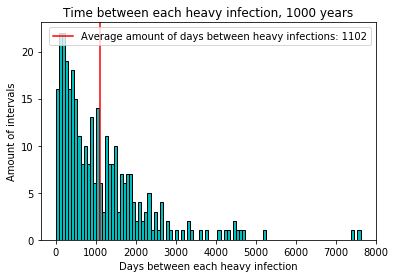

In [337]:
plt.hist(avg_next_heavy,bins=100,color='c',edgecolor='k')
plt.title("Time between each heavy infection, 1000 years")
plt.xlabel("Days between each heavy infection")
plt.ylabel("Amount of intervals")
plt.axvline(avg_days_waiting,color="r",label="Average amount of days between heavy infections: "+str(round(avg_days_waiting)))
plt.legend()
plt.savefig('timebetwheavinf.pdf')
plt.show()